In [1]:
!pip install tensorflow

In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2022-09-25 10:42:03.955676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-25 10:42:04.067247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-25 10:42:04.067262: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-25 10:42:04.089979: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-25 10:42:04.755005: W tensorflow/stream_executor/platform/de

In [3]:
#carregar dataset
dataset = keras.datasets.fashion_mnist
((x_treino, y_treino), (x_teste, y_teste)) = dataset.load_data()

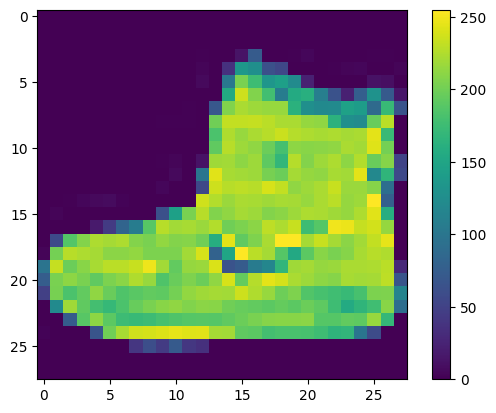

In [4]:
plt.imshow(x_treino[0])
plt.colorbar()

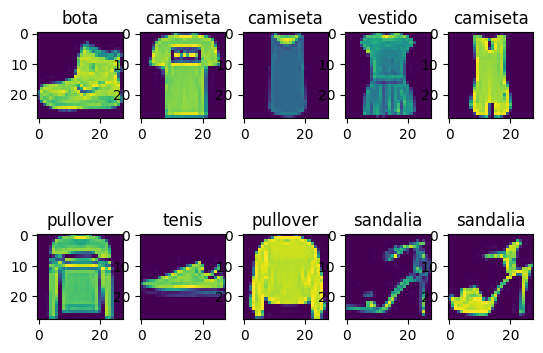

In [5]:
#exibir os dados
total_de_classificacoes = 10
nomes = ['camiseta', 'calca', 'pullover', 'vestido', 'casaco', 'sandalia', 'camisa', 'tenis', 'bolsa', 'bota']

for img in range(10):
    plt.subplot(2, 5, img+1)
    plt.imshow(x_treino[img])
    plt.title(nomes[y_treino[img]])

# Normalização dos dados

In [11]:
# a relu, deixa todos os valores negativos iguais a zero, isso é interessante no caso das imagens
# por que onde não tem o que é desejado o valor será zero =)
x_treino = x_treino/float(255)
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(x_treino, y_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.0329 - accuracy: 0.6760 - val_loss: 0.6713 - val_accuracy: 0.7581
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6198 - accuracy: 0.7751 - val_loss: 0.5788 - val_accuracy: 0.7876
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5485 - accuracy: 0.8044 - val_loss: 0.5249 - val_accuracy: 0.8160
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5092 - accuracy: 0.8190 - val_loss: 0.4963 - val_accuracy: 0.8227
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4817 - accuracy: 0.8299 - val_loss: 0.4820 - val_accuracy: 0.8249
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4639 - accuracy: 0.8364 - val_loss: 0.4613 - val_accuracy: 0.8342
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4491 - accuracy: 0.8411 - val_loss: 0.4521 - val_accuracy:

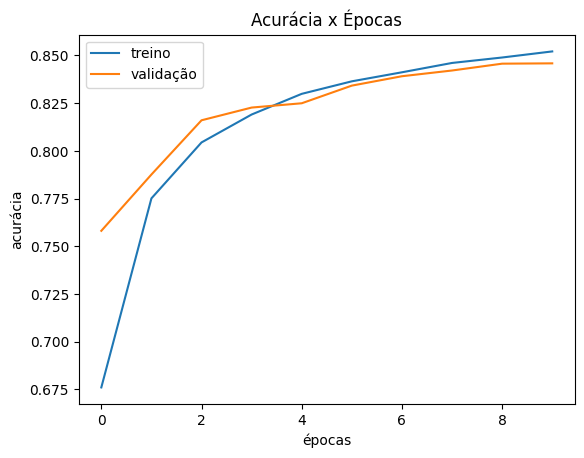

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia x Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

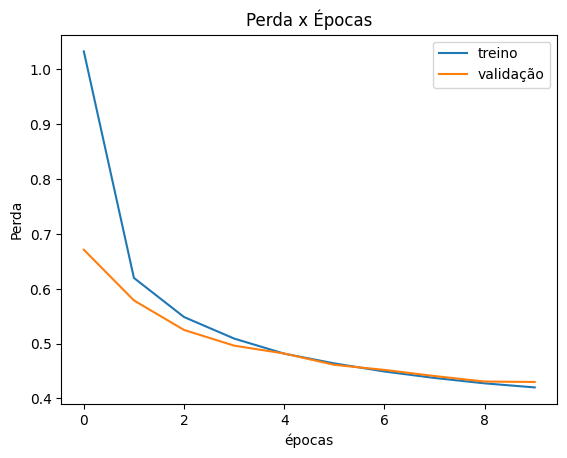

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda x Épocas')
plt.xlabel('épocas')
plt.ylabel('Perda')
plt.legend(['treino', 'validação'])

In [8]:
x_normalized_test = x_teste / 255
testes = modelo.predict(x_normalized_test)
print('resultado teste: ', np.argmax(testes[1]))
print('número da imagem de teste: ', y_teste[1])

313/313 [==============================] - 0s 1ms/step
resultado teste:  2
número da imagem de teste:  2


In [9]:
perda_teste, acuracia_teste = modelo.evaluate(x_normalized_test, y_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

313/313 [==============================] - 1s 1ms/step - loss: 0.3852 - accuracy: 0.8630
Perda do teste:  0.3852086365222931
Acurácia do teste:  0.8629999756813049
